In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
df=pd.read_csv('Housing.csv')
print(df.shape)
print(df["furnishingstatus"].unique())

(545, 13)
['furnished' 'semi-furnished' 'unfurnished']


# preprocessing

In [30]:
# Lbel Encoding cat-> numerical
binarry_map = {"yes": 1, "no": 0}
df["mainroad"] = df["mainroad"].map(binarry_map)
df["guestroom"] = df["guestroom"].map(binarry_map)
df["basement"] = df["basement"].map(binarry_map)
df["hotwaterheating"] = df["hotwaterheating"].map(binarry_map)
df["airconditioning"] = df["airconditioning"].map(binarry_map)
df["prefarea"] = df["prefarea"].map(binarry_map)

df["furnishingstatus"] = df["furnishingstatus"].map({"furnished": 1, "semi-furnished": 0.5, "unfurnished": 0})

df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1.0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1.0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0.5
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1.0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1.0


In [31]:
print(df.columns.tolist())

['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']


In [32]:
X = df.drop(columns=["price"])
y = df["price"]
X

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,1,1.0
1,8960,4,4,4,1,0,0,0,1,3,0,1.0
2,9960,3,2,2,1,0,1,0,0,2,1,0.5
3,7500,4,2,2,1,0,1,0,1,3,1,1.0
4,7420,4,1,2,1,1,1,0,1,2,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,1,0,1,0,0,2,0,0.0
541,2400,3,1,1,0,0,0,0,0,0,0,0.5
542,3620,2,1,1,1,0,0,0,0,0,0,0.0
543,2910,3,1,1,0,0,0,0,0,0,0,1.0


In [33]:
col=X.columns

for c in col:
    X[c]=(X[c]-X[c].mean())/X[c].std()

In [34]:
y=y.values.reshape(-1, 1)
X=X.values

# modals


In [112]:
def batch_gradient_descent(X, y, alpha=0.3, epochs=100):
    n_samples = X.shape[0]
    w = np.zeros((X.shape[1], 1))
    loss_history = []

    for epoch in range(epochs):
        y_pred = X @ w
        error = y_pred - y
        loss = float(1 / (2 * n_samples)) * np.sum(error ** 2)
        loss_history.append(loss)

        gradient = (1 / n_samples) * (X.T @ error)
        w -= alpha * gradient

    return w, loss_history


In [113]:
def online_gradient_descent(X, y, alpha=0.3, epochs=100):
    n_samples = X.shape[0]
    w = np.zeros((X.shape[1], 1))
    loss_history = []

    for epoch in range(epochs):
        total_loss = 0
        for i in range(n_samples):
            xi = X[i].reshape(1, -1)
            yi = y[i].reshape(1, 1)
            pred = xi @ w
            error = pred - yi
            grad = xi.T @ error
            w -= alpha * grad
            total_loss += (error ** 2).item()
        loss_history.append(total_loss / n_samples)
        # loss_history.append(total_loss)


    return w, loss_history


In [114]:
def MomentumBased_GD(X, y,b=0.9,lr=0.3, epochs=100):
    w = np.zeros((X.shape[1], 1))
    n=X.shape[0]
    v=np.zeros((X.shape[1], 1))   

    loss_history=[]

    for i in range(epochs):

        g=(X.T@((X@w)-y))/n
        v=b*v+lr*g
        w=w-v

        loss=float(0.5*np.mean(((X@w)-y)**2))
        loss_history.append(loss)
    return w,loss_history

In [115]:
def NesterovAccelerated_GD(X, y,b=0.9,lr=0.3, epochs=100):
    w = np.zeros((X.shape[1], 1))
    n=X.shape[0]
    v=np.zeros((X.shape[1],1))
    loss_history=[]

    for i in range(epochs):

        g=(X.T@((X@(w-b*v))-y))/n
        v=b*v+lr*g
        w=w-v

        loss=(0.5*np.mean(((X@w)-y)**2))
        loss_history.append(loss)
    return w,loss_history

# training

In [116]:
w_moment,loss_moment=MomentumBased_GD(X,y)

In [117]:
w_NAG,loss_NAG=NesterovAccelerated_GD(X,y)

In [118]:
w_batch, loss_batch = batch_gradient_descent(X, y)

In [119]:
w_online, loss_online = online_gradient_descent(X, y)

C:\Users\Admin\AppData\Local\Temp\ipykernel_8860\1801148744.py:15: RuntimeWarning: overflow encountered in square
  total_loss += (error ** 2).item()
C:\Users\Admin\AppData\Local\Temp\ipykernel_8860\1801148744.py:13: RuntimeWarning: overflow encountered in matmul
  grad = xi.T @ error
C:\Users\Admin\AppData\Local\Temp\ipykernel_8860\1801148744.py:14: RuntimeWarning: invalid value encountered in subtract
  w -= alpha * grad
C:\Users\Admin\AppData\Local\Temp\ipykernel_8860\1801148744.py:11: RuntimeWarning: invalid value encountered in matmul
  pred = xi @ w


# comparition

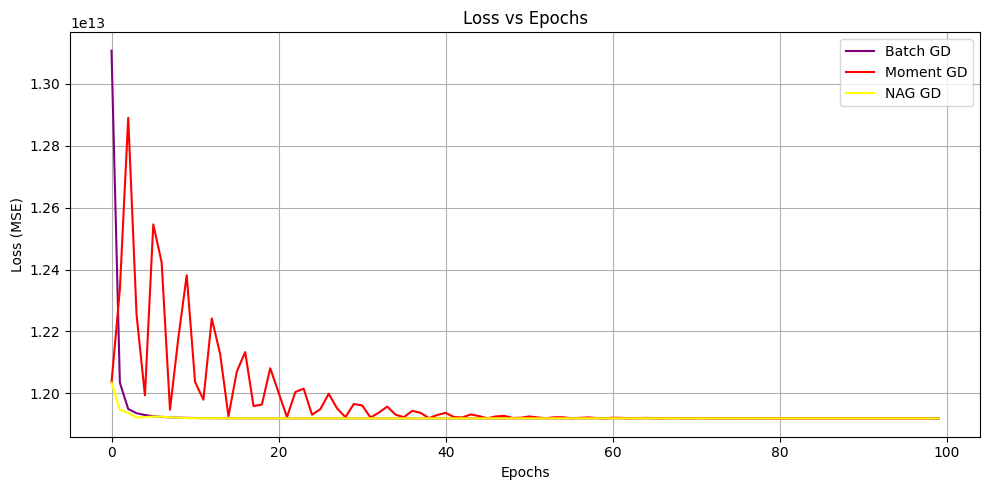

In [120]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=range(len(loss_batch)), y=loss_batch, label="Batch GD", color='purple')
sns.lineplot(x=range(len(loss_moment)), y=loss_moment, label="Moment GD", color='red')
sns.lineplot(x=range(len(loss_NAG)), y=loss_NAG, label="NAG GD", color='yellow')

plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.title("Loss vs Epochs")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


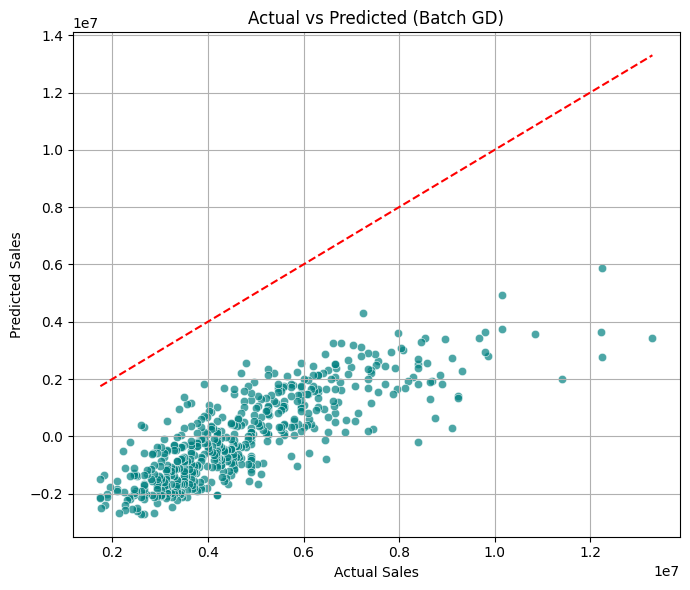

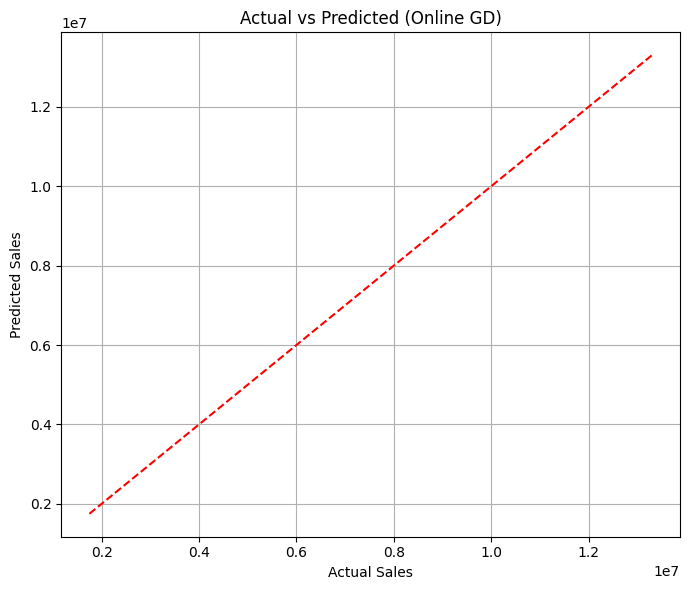

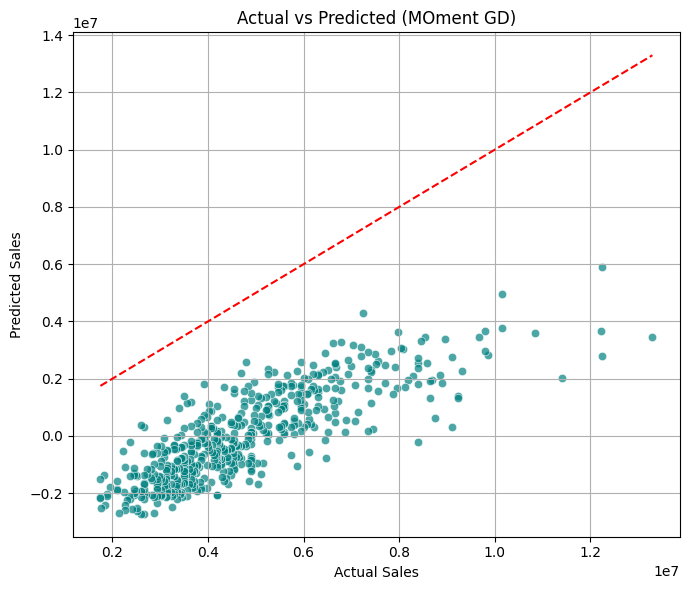

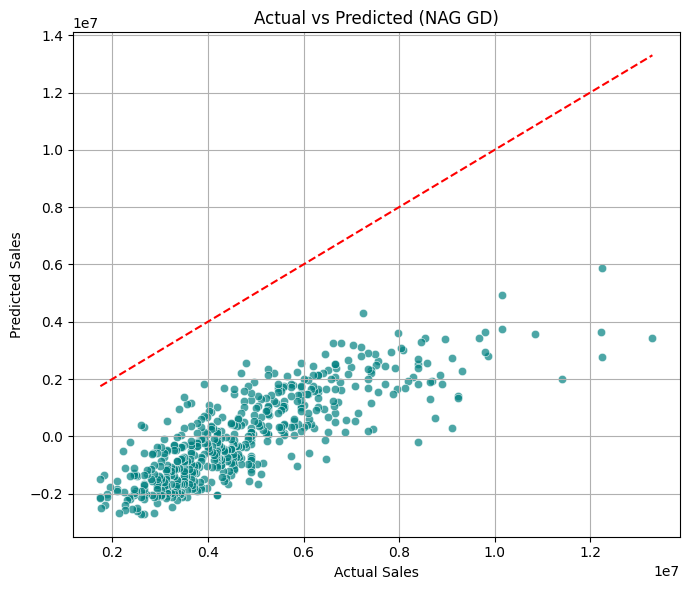

In [107]:
def plot_predictions(X, y, w, title):
    y_pred = X @ w
    plt.figure(figsize=(7, 6))
    sns.scatterplot(x=y.flatten(), y=y_pred.flatten(), color='teal', alpha=0.7)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
    plt.xlabel("Actual Sales")
    plt.ylabel("Predicted Sales")
    plt.title(title)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    return y_pred

y_pred_batch = plot_predictions(X, y, w_batch, "Actual vs Predicted (Batch GD)")
y_pred_online = plot_predictions(X, y, w_online, "Actual vs Predicted (Online GD)")
y_pred_mooment = plot_predictions(X, y, w_moment, "Actual vs Predicted (MOment GD)")
y_pred_NAG = plot_predictions(X, y, w_NAG, "Actual vs Predicted (NAG GD)")

In [108]:
def r2_score(y_true, y_pred):
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
    ss_res = np.sum((y_true - y_pred) ** 2)
    return 1 - (ss_res / ss_total)

print(f"📌 R² Score (Batch GD): {r2_score(y, y_pred_batch):.4f}")
print(f"📌 R² Score (Online GD): {r2_score(y, y_pred_online):.4f}")
print(f"📌 R² Score (Moment GD): {r2_score(y, y_pred_mooment):.4f}")
print(f"📌 R² Score (NAG GD): {r2_score(y, y_pred_NAG):.4f}")


📌 R² Score (Batch GD): -5.8265
📌 R² Score (Online GD): nan
📌 R² Score (Moment GD): -5.8265
📌 R² Score (NAG GD): -5.8265


In [109]:
    
print("\n📈 Final Parameters:")
print("Batch Gradient Descent:")
print(f"Intercept: {w_batch[0][0]:.4f}")
for i, name in enumerate(['TV', 'Radio', 'Newspaper']):
    print(f"{name}: {w_batch[i+1][0]:.4f}")

print("\nOnline Gradient Descent:")
print(f"Intercept: {w_online[0][0]:.4f}")
for i, name in enumerate(['TV', 'Radio', 'Newspaper']):
    print(f"{name}: {w_online[i+1][0]:.4f}")



📈 Final Parameters:
Batch Gradient Descent:
Intercept: 529312.3417
TV: 88179.7269
Radio: 496886.3180
Newspaper: 390711.2469

Online Gradient Descent:
Intercept: nan
TV: nan
Radio: nan
Newspaper: nan


In [110]:
def predict_new(X_new, w, X_mean, X_std):
    
    X_new = np.array(X_new).reshape(1, -1)
    X_std_safe = np.where(X_std == 0, 1, X_std)
    X_new_scaled = (X_new - X_mean) / X_std_safe
    X_new_aug = np.hstack((np.ones((1, 1)), X_new_scaled))
    y_pred = X_new_aug @ w
    return y_pred[0][0]

In [111]:
def evaluate_model(X, y, w, name="Model"):
    predictions = [sum(w[j] * x[j] for j in range(len(x))) + w[-1] for x in X]
    avg_error = np.mean(np.abs(np.array(predictions) - y))
    print(f"[{name}] Average Absolute Error: {avg_error:.2f}")
    return avg_error